In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential, load_model
from keras.layers.core import Activation
from keras.models import Model
from keras import backend as K
from keras.utils import np_utils

from keras.datasets import mnist
import numpy as np

import matplotlib.pyplot as plt

from keras import regularizers

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)

x_train shape is:  (60000, 784)
x_test shape is:  (10000, 784)


In [3]:
# encoder dimension
encoding_dim = 64  

# Input placeholder
input_img = Input(shape=(784,))

# encoded - encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', name = "encoder")(input_img)

# decoded - lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid', name = "decoder")(encoded)

# autoencoder - model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# encoder - model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Placeholder for an encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile  model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

# Fit the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 64)                50240     
_________________________________________________________________
decoder (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2452 - val_loss: 0.1630
Epoch 2/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1445 - val_loss: 0.1272
Epoch 3/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1187 - val_loss: 0.1087
Epoch 4/50
60000/60000 [===========

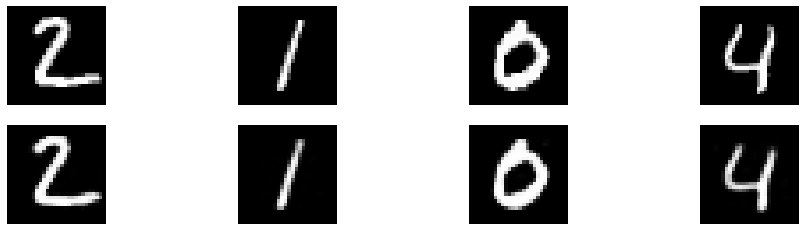

In [4]:
# decoded_imgs - decoded representation of test image
decoded_imgs = autoencoder.predict(x_test)

n = 5  # Display 4 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# Transform labels to one-hot encodings
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
# MLP code goes here for classification

# Get the coder output
x = autoencoder.get_layer('encoder').output

# Create final dense layer for classification
y = Dense(10, activation='softmax', name='predictions')(x)

# Create model
model = Model(inputs=autoencoder.inputs, outputs=y)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])

# Train the model
model.fit(x_train, Y_train, epochs=20, batch_size=256)



Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.6027 - acc: 0.6474
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4235 - acc: 0.8727
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3413 - acc: 0.9002
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3086 - acc: 0.9113
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2921 - acc: 0.9169
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2802 - acc: 0.9205
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2702 - acc: 0.9231
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2640 - acc: 0.9255
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2570 - acc: 0.9273
Epoch 10/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2517 - acc: 0.9286

In [7]:
# Evaluate it on test data
loss_and_metrics = model.evaluate(x_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.18703153738938272
Test Accuracy 0.9458
